In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import csv
df1 = pd.read_csv('/content/drive/MyDrive/Merged and sorted/sorted_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Merged and sorted/sorted_2.csv')
for i in range(2422, 2551):
  df2.iloc[i,4] = 37425.10
df3 = pd.read_csv('/content/drive/MyDrive/Merged and sorted/sorted_3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Merged and sorted/sorted_4.csv')
df = pd.concat([df4,df3,df2,df1])


In [ ]:
dfbn = pd.read_csv('/content/drive/MyDrive/^NSEBANK.csv')

In [ ]:
df['i price change'] = 0
df['PE price change'] = 0
df['CE price change'] = 0
df['total OI'] = 0
df['delta'] = 0

In [ ]:
df['PE price change']=df['Open.1'] - df['Close.1']
df['CE price change']=df['Open'] - df['Close']
df['total OI'] = df['Open Int'] + df['Open Int.1']
ddf= df.copy()
ddf.head()

In [ ]:
ddf

In [ ]:
ddf['Expiry'] = ddf['Expiry'].replace({'29-Jul-2021':'2021-07-29'})
r = '2021-07-'
s = '-Jul-2021'
for i in range(0,len(df4)):
  p = ddf.iloc[i,1]        ## finding the elements in the date section and slicing them to get just the number.
  q = int(p[0:2])
  
  for j in range(1,30):
    if ((q == j) and (j<10)): 
      t = str(0) + str(j) + s
      ddf['Date'] = ddf['Date'].replace({t:r + str(0) + str(j)})

    if ((q==j) and (j>=10)):
      u = str(j) + s 
      ddf['Date'] = ddf['Date'].replace({u:r + str(j)}) ## changed the date format >> numerical to match easily with df11 data, now will change the underlying value wala part to complete the data set.
     
ddf['Expiry'] = ddf['Expiry'].replace({'26-Aug-2021':'2021-08-26'})     
r = '2021-08-'
s = '-Aug-2021'
for i in range(len(df4),len(df4)+len(df3)):
  p = ddf.iloc[i,1]        ## finding the elements in the date section and slicing them to get just the number.
  q = int(p[0:2])
  
  for j in range(1,30):
    if ((q == j) and (j<10)): 
      t = str(0) + str(j) + s
      ddf['Date'] = ddf['Date'].replace({t:r + str(0) + str(j)})

    if ((q==j) and (j>=10)):
      u = str(j) + s 
      ddf['Date'] = ddf['Date'].replace({u:r + str(j)}) 

ddf['Expiry'] = ddf['Expiry'].replace({'30-Sep-2021':'2021-09-30'})
r = '2021-09-'
s = '-Sep-2021'
for i in range(len(df4)+len(df3),len(df4)+len(df3)+len(df2)):
  p = ddf.iloc[i,1]        ## finding the elements in the date section and slicing them to get just the number.
  q = int(p[0:2])
  
  for j in range(1,31):
    if ((q == j) and (j<10)): 
      t = str(0) + str(j) + s
      ddf['Date'] = ddf['Date'].replace({t:r + str(0) + str(j)})

    if ((q==j) and (j>=10)):
      u = str(j) + s 
      ddf['Date'] = ddf['Date'].replace({u:r + str(j)}) 


ddf['Expiry'] = ddf['Expiry'].replace({'28-Oct-2021':'2021-10-28'})
r = '2021-10-'
s = '-Oct-2021'
for i in range(len(df4)+len(df3)+len(df2),len(df4)+len(df3)+len(df2)+len(df1)):
  p = ddf.iloc[i,1]        ## finding the elements in the date section and slicing them to get just the number.
  q = int(p[0:2])
  
  for j in range(1,30):
    if ((q == j) and (j<10)): 
      t = str(0) + str(j) + s
      ddf['Date'] = ddf['Date'].replace({t:r + str(0) + str(j)})

    if ((q==j) and (j>=10)):
      u = str(j) + s 
      ddf['Date'] = ddf['Date'].replace({u:r + str(j)}) 

In [ ]:
for i in dfbn['Date']:
  p = dfbn.index[dfbn['Date']== i ]
  for j in range(0,len(ddf)):
    if (i==ddf.iloc[j,1]):
      ddf.iloc[j,4] = dfbn.iloc[p[0],4]


In [ ]:
ddf

In [ ]:
ddf = ddf.drop(columns=['Unnamed: 0','Premium Turnover in Lacs','Premium Turnover in Lacs.1','Underlying Value.1','i price change'])


In [ ]:
ddf['ATM_strike'] = 0

In [ ]:
ddf = ddf.reset_index()
del ddf['index']

In [ ]:
ddf.loc[ddf['Date'] == '2021-08-03'].index[0]
len(ddf)

9065

In [ ]:
for i in range(0,len(ddf)):
  ddf['ATM_strike'][i] = round(ddf.iloc[i,3],-2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ddf


,Date,Expiry,Option Type,Underlying Value,Open,High,Low,Close,LTP,No. of contracts,Change in OI,Open Int,Strike Price,Open Int.1,Change in OI.1,No. of contracts.1,Open.1,High.1,Low.1,Close.1,LTP.1,Option Type.1,PE price change,CE price change,total OI,delta,ATM_strike
0,2021-07-01,2021-07-29,CE,34684,6629.30,6884.70,6629.30,6746.30,6746.30,3,0,3650,28200,9100.0,3300.0,316.0,19.2,20.00,14.30,17.25,17.3,PE,1.95,-117.00,12750.0,0,34700
1,2021-07-01,2021-07-29,CE,34684,0.00,0.00,0.00,5037.25,0.00,0,0,0,28300,0.0,0.0,0.0,0.0,0.00,0.00,816.65,0.0,PE,-816.65,-5037.25,0.0,0,34700
2,2021-07-01,2021-07-29,CE,34684,0.00,0.00,0.00,4964.90,0.00,0,0,0,28400,0.0,0.0,0.0,0.0,0.00,0.00,843.40,0.0,PE,-843.40,-4964.90,0.0,0,34700
3,2021-07-01,2021-07-29,CE,34684,6320.00,6435.00,6300.05,6324.50,6329.35,32,400,11250,28500,24150.0,650.0,596.0,17.7,22.95,14.25,16.75,16.0,PE,0.95,-4.50,35400.0,0,34700
4,2021-07-01,2021-07-29,CE,34684,0.00,0.00,0.00,4990.80,0.00,0,0,0,28600,0.0,0.0,0.0,0.0,0.00,0.00,869.90,0.0,PE,-869.90,-4990.80,0.0,0,34700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9060,2021-10-28,2021-10-28,CE,39508.9,2.95,6.80,0.05,0.35,0.10,3626,5600,13675,44800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,NaN,0,39500
9061,2021-10-28,2021-10-28,CE,39508.9,3.10,7.15,0.10,0.35,0.40,8776,13075,108275,44900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.75,NaN,0,39500
9062,2021-10-28,2021-10-28,CE,39508.9,3.45,7.20,0.15,0.50,0.35,188720,167625,754550,45000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.95,NaN,0,39500
9063,2021-10-28,2021-10-28,CE,39508.9,2.25,7.00,0.15,0.40,0.40,7781,10675,23525,45100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85,NaN,0,39500


In [ ]:
ddf.insert(4, 'ATM_strike', ddf.pop("ATM_strike"))
ddf

,Date,Expiry,Option Type,Underlying Value,ATM_strike,Open,High,Low,Close,LTP,No. of contracts,Change in OI,Open Int,Strike Price,Open Int.1,Change in OI.1,No. of contracts.1,Open.1,High.1,Low.1,Close.1,LTP.1,Option Type.1,PE price change,CE price change,total OI,delta
0,2021-07-01,2021-07-29,CE,34684,34700,6629.30,6884.70,6629.30,6746.30,6746.30,3,0,3650,28200,9100.0,3300.0,316.0,19.2,20.00,14.30,17.25,17.3,PE,1.95,-117.00,12750.0,0
1,2021-07-01,2021-07-29,CE,34684,34700,0.00,0.00,0.00,5037.25,0.00,0,0,0,28300,0.0,0.0,0.0,0.0,0.00,0.00,816.65,0.0,PE,-816.65,-5037.25,0.0,0
2,2021-07-01,2021-07-29,CE,34684,34700,0.00,0.00,0.00,4964.90,0.00,0,0,0,28400,0.0,0.0,0.0,0.0,0.00,0.00,843.40,0.0,PE,-843.40,-4964.90,0.0,0
3,2021-07-01,2021-07-29,CE,34684,34700,6320.00,6435.00,6300.05,6324.50,6329.35,32,400,11250,28500,24150.0,650.0,596.0,17.7,22.95,14.25,16.75,16.0,PE,0.95,-4.50,35400.0,0
4,2021-07-01,2021-07-29,CE,34684,34700,0.00,0.00,0.00,4990.80,0.00,0,0,0,28600,0.0,0.0,0.0,0.0,0.00,0.00,869.90,0.0,PE,-869.90,-4990.80,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9060,2021-10-28,2021-10-28,CE,39508.9,39500,2.95,6.80,0.05,0.35,0.10,3626,5600,13675,44800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,NaN,0
9061,2021-10-28,2021-10-28,CE,39508.9,39500,3.10,7.15,0.10,0.35,0.40,8776,13075,108275,44900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.75,NaN,0
9062,2021-10-28,2021-10-28,CE,39508.9,39500,3.45,7.20,0.15,0.50,0.35,188720,167625,754550,45000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.95,NaN,0
9063,2021-10-28,2021-10-28,CE,39508.9,39500,2.25,7.00,0.15,0.40,0.40,7781,10675,23525,45100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85,NaN,0


In [ ]:
pr = []
for i in range(0,len(ddf['Strike Price'])):
  if (ddf.iloc[i,4] == ddf.iloc[i,13]): 
    pr.append(ddf.iloc[i,0])
print(pr)

['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-19', '2021-07-20', '2021-07-22', '2021-07-23', '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29', '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-20', '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26', '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-18', '2021-10-19', '2021

In [ ]:
dff = ddf.loc[ddf['ATM_strike'] == ddf['Strike Price']]
dff = dff.reset_index(drop=True)
dff

,Date,Expiry,Option Type,Underlying Value,ATM_strike,Open,High,Low,Close,LTP,No. of contracts,Change in OI,Open Int,Strike Price,Open Int.1,Change in OI.1,No. of contracts.1,Open.1,High.1,Low.1,Close.1,LTP.1,Option Type.1,PE price change,CE price change,total OI,delta
0,2021-07-01,2021-07-29,CE,34684,34700,861.35,935.00,772.90,785.95,797.20,2781,10825,19450,34700,20275.0,7250.0,4170.0,613.05,678.85,553.45,628.25,600.00,PE,-15.20,75.40,39725.0,0
1,2021-07-02,2021-07-29,CE,34809.9,34800,794.55,799.00,662.60,736.85,757.75,6641,11425,65525,34800,37625.0,11325.0,5024.0,596.15,700.10,561.85,590.00,563.10,PE,6.15,57.70,103150.0,0
2,2021-07-05,2021-07-29,CE,35212,35200,594.05,688.65,580.00,676.40,678.00,5694,15525,78175,35200,61725.0,11875.0,3759.0,701.50,739.95,527.70,539.45,555.00,PE,162.05,-82.35,139900.0,0
3,2021-07-06,2021-07-29,CE,35579.1,35600,467.40,811.75,462.85,637.45,611.90,5013,3325,21925,35600,19400.0,15375.0,6258.0,707.40,707.40,482.00,557.55,574.00,PE,149.85,-170.05,41325.0,0
4,2021-07-07,2021-07-29,CE,35771.3,35800,487.25,655.00,447.65,636.50,654.00,5409,7450,37600,35800,49125.0,9150.0,3341.0,704.80,734.75,551.70,564.80,569.00,PE,140.00,-149.25,86725.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2021-10-22,2021-10-28,CE,40323.6,40300,438.65,597.60,352.65,431.45,436.00,1146174,359000,596900,40300,496700.0,454975.0,1069961.0,444.20,479.50,293.75,341.40,308.05,PE,102.80,7.20,1093600.0,0
74,2021-10-25,2021-10-28,CE,41192.4,41200,175.00,914.50,131.15,408.20,434.00,843915,49050,379700,41200,336100.0,329550.0,494054.0,664.00,920.70,230.00,341.75,292.25,PE,322.25,-233.20,715800.0,0
75,2021-10-26,2021-10-28,CE,41238.3,41200,434.00,460.00,198.05,356.75,380.40,1320646,170250,549950,41200,519200.0,183100.0,1022252.0,400.25,519.75,176.80,211.60,185.70,PE,188.65,77.25,1069150.0,0
76,2021-10-27,2021-10-28,CE,40874.4,40900,514.05,572.40,173.75,248.15,180.00,310821,301625,453075,40900,8500.0,-3250.0,1101.0,4.25,5.45,1.05,1.60,1.05,PE,2.65,265.90,461575.0,0


In [ ]:
dfbn['Percent Movement'] = 0
dfbn['index change'] = 0
for i in range(0,len(dfbn)-1):
  dfbn.iloc[i,8] = (dfbn.iloc[i+1,4]-dfbn.iloc[i,4])
  dfbn.iloc[i,7] = 100*(dfbn.iloc[i+1,4]-dfbn.iloc[i,4])/dfbn.iloc[i,4]
dfbn


,Date,Open,High,Low,Close,Adj Close,Volume,Percent Movement,index change
0,2020-12-16,30920.349609,30932.250000,30587.099609,30698.400391,30698.400391,0.0,0.484228,148.650390
1,2020-12-17,30791.199219,30945.199219,30643.900391,30847.050781,30847.050781,0.0,-0.429216,-132.400390
2,2020-12-18,30841.849609,30854.050781,30374.500000,30714.650391,30714.650391,0.0,-4.096420,-1258.201172
3,2020-12-21,30595.800781,30607.500000,29201.199219,29456.449219,29456.449219,0.0,0.575426,169.500000
4,2020-12-22,29607.500000,29711.150391,28976.750000,29625.949219,29625.949219,0.0,0.868669,257.351562
...,...,...,...,...,...,...,...,...,...
242,2021-12-09,37331.750000,37397.550781,36884.449219,37082.449219,37082.449219,123200.0,0.062561,23.199219
243,2021-12-10,37083.148438,37153.250000,36824.398438,37105.648438,37105.648438,170900.0,-0.486175,-180.398438
244,2021-12-13,37358.199219,37581.050781,36861.898438,36925.250000,36925.250000,157300.0,-0.084768,-31.300781
245,2021-12-14,36778.949219,37039.050781,36545.398438,36893.949219,36893.949219,132200.0,-0.282969,-104.398438


In [ ]:
dd={'Date':[], 'Open':[], 'High':[], 'Low':[], 'Close':[], 'Adj Close':[], 'Volume':[],
        'Percent Movement':[]}
ddff = pd.DataFrame(dd)

In [ ]:
for i in pr:
  ddff = ddff.append(dfbn.loc[dfbn['Date'] == i])
ddff = ddff.reset_index(drop=True)

In [ ]:
ddff


,Date,Open,High,Low,Close,Adj Close,Volume,Percent Movement,index change
0,2021-07-01,34866.000000,34917.648438,34650.949219,34684.000000,34684.000000,164000.0,0.362987,125.898438
1,2021-07-02,34728.101563,34894.449219,34632.601563,34809.898438,34809.898438,165600.0,1.155136,402.101562
2,2021-07-05,35010.949219,35234.300781,34926.398438,35212.000000,35212.000000,0.0,1.042680,367.148438
3,2021-07-06,35173.601563,35807.449219,35165.550781,35579.148438,35579.148438,0.0,0.540070,192.152343
4,2021-07-07,35550.601563,35795.750000,35427.648438,35771.300781,35771.300781,0.0,-1.389939,-497.199218
...,...,...,...,...,...,...,...,...,...
73,2021-10-22,40192.648438,40587.351563,40149.550781,40323.648438,40323.648438,370500.0,2.154443,868.750000
74,2021-10-25,40961.250000,41829.601563,40508.101563,41192.398438,41192.398438,476800.0,0.111434,45.902343
75,2021-10-26,41057.750000,41367.250000,40829.148438,41238.300781,41238.300781,437100.0,-0.882551,-363.949218
76,2021-10-27,41234.550781,41347.000000,40750.000000,40874.351563,40874.351563,322800.0,-3.340487,-1365.402344


In [ ]:
ddff.to_csv('index change data.csv')

In [ ]:
dff['Index change'] = ddff['index change']
dff['Percent change'] = ddff['Percent Movement']
dff.insert(5, 'Index change', dff.pop("Index change"))
dff.insert(6,'Percent change',dff.pop("Percent change"))
dff.head()


,Date,Expiry,Option Type,Underlying Value,ATM_strike,Index change,Percent change,Open,High,Low,Close,LTP,No. of contracts,Change in OI,Open Int,Strike Price,Open Int.1,Change in OI.1,No. of contracts.1,Open.1,High.1,Low.1,Close.1,LTP.1,Option Type.1,PE price change,CE price change,total OI,delta
0,2021-07-01,2021-07-29,CE,34684,34700,125.898438,0.362987,861.35,935.00,772.90,785.95,797.20,2781,10825,19450,34700,20275.0,7250.0,4170.0,613.05,678.85,553.45,628.25,600.0,PE,-15.20,75.40,39725.0,0
1,2021-07-02,2021-07-29,CE,34809.9,34800,402.101562,1.155136,794.55,799.00,662.60,736.85,757.75,6641,11425,65525,34800,37625.0,11325.0,5024.0,596.15,700.10,561.85,590.00,563.1,PE,6.15,57.70,103150.0,0
2,2021-07-05,2021-07-29,CE,35212,35200,367.148438,1.042680,594.05,688.65,580.00,676.40,678.00,5694,15525,78175,35200,61725.0,11875.0,3759.0,701.50,739.95,527.70,539.45,555.0,PE,162.05,-82.35,139900.0,0
3,2021-07-06,2021-07-29,CE,35579.1,35600,192.152343,0.540070,467.40,811.75,462.85,637.45,611.90,5013,3325,21925,35600,19400.0,15375.0,6258.0,707.40,707.40,482.00,557.55,574.0,PE,149.85,-170.05,41325.0,0
4,2021-07-07,2021-07-29,CE,35771.3,35800,-497.199218,-1.389939,487.25,655.00,447.65,636.50,654.00,5409,7450,37600,35800,49125.0,9150.0,3341.0,704.80,734.75,551.70,564.80,569.0,PE,140.00,-149.25,86725.0,0


In [ ]:
dff.to_csv('monthly_expiry basic data.csv')

In [ ]:
data = [dff["Underlying Value"], dff["Index change"], dff['total OI'],dff['Percent change']]
header = ['Underlying Value','Index change','total OI','Percent Change']
df3 = pd.concat(data, axis=1, keys=header)

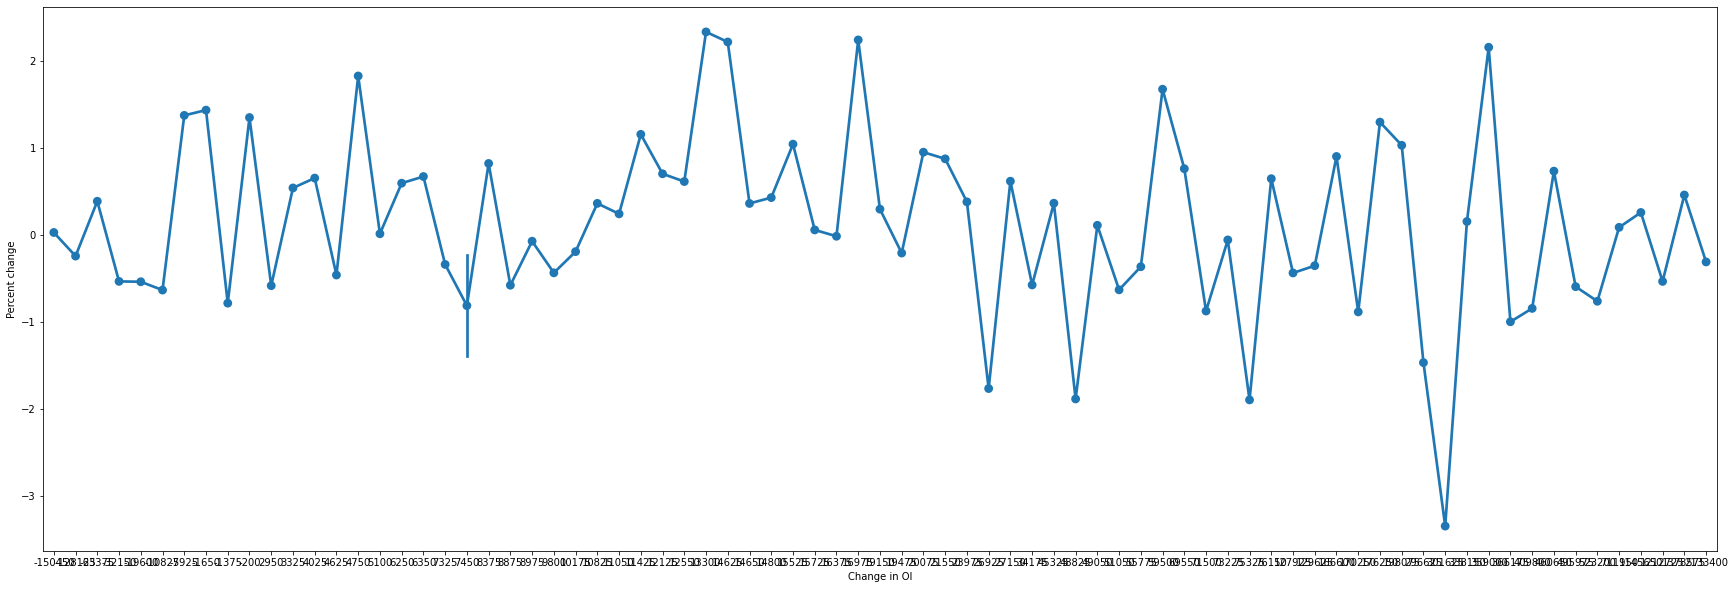

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(data=dff,x = dff['Change in OI'], y = dff['Percent change'])

In [ ]:
#import seaborn as sns
#df_melted = df.melt("year",var_name="Action&Comedy",value_name="Rating")
#sns.relplot(data=df_melt, x="year", y="Rating", hue="Action&Comedy",kind="line", height=4, aspect=.7)

In [ ]:
df_exp = []
df_exp1 = pd.DataFrame(df_exp)
df_exp1['Date'] = ddf['Date']
df_exp1['PE_△OI'] = ddf['Change in OI.1']
df_exp1['PE_OI'] = ddf['Open Int.1']
df_exp1['Strike'] = ddf['Strike Price']
df_exp1['CE_OI'] = ddf['Open Int']
df_exp1['CE_△OI'] = ddf['Change in OI']
df_exp1['wt_PE'] = ddf['Strike Price']*ddf['Change in OI.1']
df_exp1['wt_CE'] = ddf['Strike Price']*ddf['Change in OI']





In [ ]:
df_exp1.to_csv('exp1.csv')

In [ ]:
df_exp1['Date'].unique()


In [ ]:
import numpy as np
Dict1 = dict(zip(df_exp1['Date'].unique(), np.zeros(78)))

In [ ]:
for i in Dict1.keys():
  samp = df_exp1[df_exp1['Date'] == i]
  total = samp['wt_PE'].sum()
  total1 = samp['wt_CE'].sum()
  samp['wt_PE'] = samp['wt_PE']/total
  samp['wt_CE'] = samp['wt_CE']/total1
  samp['new_strike_PE'] = samp['wt_PE']*samp['Strike']
  samp['new_strike_CE'] = samp['wt_CE']*samp['Strike']
  New_CE = samp['new_strike_CE'].sum()
  New_PE = samp['new_strike_PE'].sum()



In [ ]:
  Dict1[i] = [round(New_CE,-2)-round(New_PE,-2)]

In [ ]:
Dict1


In [ ]:
import matplotlib.pylab as plt
import numpy as np
y = np.array(list(Dict1.values())).astype('int32')
x = np.array(list(Dict1.keys()))
x1 = np.array(list(range(1,77)))
plt.rcParams["figure.figsize"] = (40,10)
plt.plot(x1,y,'r')
m, b = np.polyfit(x1,y,1)
plt.plot(x1, m*x1 + b,'y')
plt.bar(x1, np.array(dff['Percent change'])[:-1]*1000)
plt.show()

In [ ]:
len(y)

In [ ]:
len(np.array(dff['Percent change']))
